# **PROBLEMA DE NEGOCIO**


---




### Una tienda online de moda, con presencia en todo Brasil, necesita impulsar su rendimiento utilizando sus datos de manera estratégica. Como científico de datos, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es el Top 5 productos más vendidos históricamente?

2. ¿Cual es la evolución histórica de las ingresos netos?

3. ¿Cuáles son los ingresos netos por vendedor por año?

4. ¿Cuáles son las ciudades que proporcionan mayores ingresos netos?

5. ¿Existe otro insight que puedas proporcionar?

### **1. Configuración del Ambiente**


---




In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




#### **2.1 Cargando las bases de datos**

Base de datos con el detalle de los pedidos

In [52]:
df_itens_pedidos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/itens_pedidos.csv')
df_itens_pedidos.head()

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0


In [53]:
df_itens_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_recibo       24527 non-null  int64  
 1   producto_id     24527 non-null  int64  
 2   pedido_id       24527 non-null  int64  
 3   cantidad        24527 non-null  int64  
 4   valor_unitario  24527 non-null  int64  
 5   valor_total     24527 non-null  int64  
 6   ciudad          24527 non-null  object 
 7   costo_envio     24527 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB


se verifican duplicados

In [54]:
df_itens_pedidos.isna().sum()

id_recibo         0
producto_id       0
pedido_id         0
cantidad          0
valor_unitario    0
valor_total       0
ciudad            0
costo_envio       0
dtype: int64

Base de datos general de los pedidos

In [55]:
df_pedidos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/pedidos.csv')
df_pedidos.head()

,pedido_id,producto_id,vendedor_id,fecha_compra,total
0,341,41518,6,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575


In [56]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pedido_id     24527 non-null  int64 
 1   producto_id   24527 non-null  int64 
 2   vendedor_id   24527 non-null  int64 
 3   fecha_compra  24527 non-null  object
 4   total         24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


Se observa que el tipo de dato de la fecha de compra no es el correcto, se transforma en datetime

In [57]:
df_pedidos['fecha_compra'] = pd.to_datetime(df_pedidos['fecha_compra'])

Base de datos de los productos

In [58]:
df_productos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/productos.csv')
df_productos.head()

,producto_id,producto,precio,marca,sku,condicion
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297.0,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612.0,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482.0,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658.0,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248.0,Usado


In [59]:
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   producto_id  207 non-null    int64  
 1   producto     205 non-null    object 
 2   precio       207 non-null    int64  
 3   marca        207 non-null    object 
 4   sku          205 non-null    float64
 5   condicion    207 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.8+ KB


se verifican cuales son los valores nulos

In [60]:
df_productos[df_productos.isna().any(axis=1)]

,producto_id,producto,precio,marca,sku,condicion
205,41598,NaN,260,Banana Republic,NaN,Nuevo con etiqueta
206,32926,NaN,210,Limone By Jade Seba,NaN,Nuevo sin etiqueta


se borran estos valores nulos

In [61]:
df_productos.dropna(axis=0, inplace=True)

Base de datos de los vendedores

In [62]:
df_vendedores = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/vendedores.csv')
df_vendedores.head()

,vendedor_id,nombre_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca


In [63]:
df_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   vendedor_id      6 non-null      int64 
 1   nombre_vendedor  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


## **2.2 Feature engineering**

### DataFrame df_itens_pedidos
Se verifica la columna ciudad, y se reemplaza por otra columna con el nombre de la ciudad

In [64]:
df_itens_pedidos.head(10)

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0
5,6,72621,2980,3,179,537,BR-MG,107.4
6,7,86243,3443,4,350,1400,BR-PR,280.0
7,8,29012,3557,5,525,2625,BR-MS,525.0
8,9,61071,3585,3,450,1350,BR-SP,270.0
9,10,100961,3687,2,480,960,BR-GO,192.0


se verifican todos los valores unicos que hay en la columna ciudades

In [65]:
df_itens_pedidos['ciudad'].unique()

array(['BR-BA', 'BR-RJ', 'BR-PB', 'BR-DF', 'BR-MG', 'BR-PR', 'BR-MS',
       'BR-SP', 'BR-GO', 'BR-AM', 'BR-CE', 'BR-RS', 'BR-AC', 'BR-RO',
       'BR-MT', 'BR-RR', 'BR-PE', 'BR-MA', 'BR-PA', 'BR-SC', 'BR-SE',
       'BR-TO', 'BR-AP', 'BR-PI', 'BR-ES', 'BR-AL', 'BR-RN'], dtype=object)

Se crea un diccionario con las ciudades

In [66]:
ciudades_dict = {
    'BR-BA': 'Bahia',
    'BR-RJ': 'Rio de Janeiro',
    'BR-PB': 'Paraíba',
    'BR-DF': 'Distrito Federal',
    'BR-MG': 'Minas Gerais',
    'BR-PR': 'Paraná',
    'BR-MS': 'Mato Grosso do Sul',
    'BR-SP': 'São Paulo',
    'BR-GO': 'Goiás',
    'BR-AM': 'Amazonas',
    'BR-CE': 'Ceará',
    'BR-RS': 'Rio Grande do Sul',
    'BR-AC': 'Acre',
    'BR-RO': 'Rondônia',
    'BR-MT': 'Mato Grosso',
    'BR-RR': 'Roraima',
    'BR-PE': 'Pernambuco',
    'BR-MA': 'Maranhão',
    'BR-PA': 'Pará',
    'BR-SC': 'Santa Catarina',
    'BR-SE': 'Sergipe',
    'BR-TO': 'Tocantins',
    'BR-AP': 'Amapá',
    'BR-PI': 'Piauí',
    'BR-ES': 'Espírito Santo',
    'BR-AL': 'Alagoas',
    'BR-RN': 'Rio Grande do Norte'
}


Se mapea y se crea la columna nueva

In [67]:
df_itens_pedidos['ciudad'] = df_itens_pedidos['ciudad'].map(ciudades_dict)

Se visualiza el cambio de la columna ciudad

In [68]:
df_itens_pedidos.head()

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,1,41518,341,3,260,780,Bahia,156.0
1,2,4307,1174,5,6175,30875,Rio de Janeiro,6175.0
2,3,22407,1399,3,200,600,Paraíba,120.0
3,4,3820,1652,6,139,834,Distrito Federal,166.8
4,5,29012,2470,3,525,1575,Bahia,315.0


Se crea las columnas latitud y longitud para cada ciudad

In [69]:
coordenadas = {
    'Bahia': {'latitud': -12.9704, 'longitud': -38.5124},
    'Rio de Janeiro': {'latitud': -22.9068, 'longitud': -43.1729},
    'Paraíba': {'latitud': -7.2398, 'longitud': -36.7819},
    'Distrito Federal': {'latitud': -15.7939, 'longitud': -47.8828},
    'Minas Gerais': {'latitud': -19.9286, 'longitud': -43.9386},
    'Paraná': {'latitud': -25.2521, 'longitud': -52.0215},
    'Mato Grosso do Sul': {'latitud': -20.4428, 'longitud': -54.6464},
    'São Paulo': {'latitud': -23.5505, 'longitud': -46.6333},
    'Goiás': {'latitud': -16.6869, 'longitud': -49.2648},
    'Amazonas': {'latitud': -3.1190, 'longitud': -60.0217},
    'Ceará': {'latitud': -3.7172, 'longitud': -38.5434},
    'Rio Grande do Sul': {'latitud': -30.0346, 'longitud': -51.2177},
    'Acre': {'latitud': -9.0238, 'longitud': -70.8120},
    'Rondônia': {'latitud': -8.7612, 'longitud': -63.9039},
    'Mato Grosso': {'latitud': -15.6014, 'longitud': -56.0979},
    'Roraima': {'latitud': 2.8235, 'longitud': -60.6758},
    'Pernambuco': {'latitud': -8.0476, 'longitud': -34.8770},
    'Maranhão': {'latitud': -2.5387, 'longitud': -44.2829},
    'Pará': {'latitud': -1.4558, 'longitud': -48.4902},
    'Santa Catarina': {'latitud': -27.5954, 'longitud': -48.5480},
    'Sergipe': {'latitud': -10.9472, 'longitud': -37.0731},
    'Tocantins': {'latitud': -10.2527, 'longitud': -48.2530},
    'Amapá': {'latitud': 0.0340, 'longitud': -51.0694},
    'Piauí': {'latitud': -5.0892, 'longitud': -42.8016},
    'Espírito Santo': {'latitud': -20.3155, 'longitud': -40.3128},
    'Alagoas': {'latitud': -9.5713, 'longitud': -36.7820},
    'Rio Grande do Norte': {'latitud': -5.7945, 'longitud': -35.2110}
}


Se crea la columna de latitud y longitud

In [70]:
df_itens_pedidos['latitud'] = df_itens_pedidos['ciudad'].map(lambda x: coordenadas[x]['latitud'])
df_itens_pedidos['longitud'] = df_itens_pedidos['ciudad'].map(lambda x: coordenadas[x]['longitud'])

Se crea las columnas de mes y año

In [71]:
df_pedidos['anio'] = df_pedidos['fecha_compra'].dt.year
df_pedidos['mes'] = df_pedidos['fecha_compra'].dt.month_name()
df_pedidos['num_mes'] = df_pedidos['fecha_compra'].dt.month

df_pedidos.head(1)

,pedido_id,producto_id,vendedor_id,fecha_compra,total,anio,mes,num_mes
0,341,41518,6,2019-01-05,780,2019,January,1


### DataFrame productos
se crea otra columna con el tipo de producto, para ello se extrae la primera palabra de la columna producto

In [72]:
df_productos.head()

,producto_id,producto,precio,marca,sku,condicion
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297.0,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612.0,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482.0,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658.0,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248.0,Usado


In [73]:
df_productos['tipo_producto'] = df_productos['producto'].str.split().str[0]

insertamos la nueva columna en la segunda posicion

In [74]:
df_productos.insert(2, 'tipo_producto', df_productos.pop('tipo_producto'))

In [75]:
df_productos.head()

,producto_id,producto,tipo_producto,precio,marca,sku,condicion
0,21244,Oculos Lente Azulada,Oculos,1120,D&g Dolce & Gabbana,209297.0,Usado
1,9981,Bolsa Coral Saco,Bolsa,4000,Givenchy,278612.0,Usado
2,84176,Camisa Xadrez Verde,Camisa,310,Joe Fresh,322482.0,Usado
3,47475,Calca Alfaiataria Preta,Calca,490,Mixed,263658.0,Usado
4,74864,Vestido Jeans Babados,Vestido,130,Zara,219248.0,Usado


## Una vez tratados los datos se unen los cuatro DataFrames

In [76]:
df_itens_pedidos.head(1)


,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio,latitud,longitud
0,1,41518,341,3,260,780,Bahia,156.0,-12.9704,-38.5124


In [77]:
df_pedidos.head(1)

,pedido_id,producto_id,vendedor_id,fecha_compra,total,anio,mes,num_mes
0,341,41518,6,2019-01-05,780,2019,January,1


In [78]:
df_productos.head(1)

,producto_id,producto,tipo_producto,precio,marca,sku,condicion
0,21244,Oculos Lente Azulada,Oculos,1120,D&g Dolce & Gabbana,209297.0,Usado


In [79]:
df_vendedores.head(6)

,vendedor_id,nombre_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca
5,6,Unknown


In [80]:
df_itens_pedidos['valor_total'].sum() 

45803930

In [81]:
df_final = df_itens_pedidos.merge(df_pedidos, on=['producto_id', 'pedido_id']).merge(df_productos, on= 'producto_id').merge(df_vendedores, on='vendedor_id')

In [82]:
df_final.head(3)

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio,latitud,longitud,...,anio,mes,num_mes,producto,tipo_producto,precio,marca,sku,condicion,nombre_vendedor
0,1,41518,341,3,260,780,Bahia,156.0,-12.9704,-38.5124,...,2019,January,1,Calca Jeans Basica,Calca,260,Banana Republic,255410.0,Nuevo con etiqueta,Unknown
1,2,4307,1174,5,6175,30875,Rio de Janeiro,6175.0,-22.9068,-43.1729,...,2019,January,1,Bolsa Intrecciato Caramelo,Bolsa,6175,Bottega Veneta,301305.0,Usado,Nadia Oliveira
2,3,22407,1399,3,200,600,Paraíba,120.0,-7.2398,-36.7819,...,2019,January,1,Cropped Listras Florzinhas,Cropped,200,Topshop,327426.0,Usado,Ana Duarte


se borran columnas que se repiten, precio y total

In [83]:
df_final.drop(columns=['precio', 'total'], inplace=True)

In [84]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_recibo        24527 non-null  int64         
 1   producto_id      24527 non-null  int64         
 2   pedido_id        24527 non-null  int64         
 3   cantidad         24527 non-null  int64         
 4   valor_unitario   24527 non-null  int64         
 5   valor_total      24527 non-null  int64         
 6   ciudad           24527 non-null  object        
 7   costo_envio      24527 non-null  float64       
 8   latitud          24527 non-null  float64       
 9   longitud         24527 non-null  float64       
 10  vendedor_id      24527 non-null  int64         
 11  fecha_compra     24527 non-null  datetime64[ns]
 12  anio             24527 non-null  int32         
 13  mes              24527 non-null  object        
 14  num_mes          24527 non-null  int32

# EDA

In [85]:
df_final.describe()

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,costo_envio,latitud,longitud,vendedor_id,fecha_compra,anio,num_mes,sku
count,24527.000000,24527.000000,24527.000000,24527.000000,24527.00000,24527.000000,24527.000000,24527.000000,24527.000000,24527.000000,24527,24527.000000,24527.000000,24527.000000
mean,12405.414278,44627.641171,69931.383088,3.497126,535.68867,1867.490113,373.498023,-12.332892,-47.389147,2.975782,2020-04-02 12:10:46.406001664,2019.741020,6.676887,302916.864802
min,1.000000,2706.000000,1.000000,1.000000,45.00000,45.000000,9.000000,-30.034600,-70.812000,1.000000,2019-01-05 00:00:00,2019.000000,1.000000,101494.000000
25%,6132.500000,17258.000000,34487.000000,2.000000,210.00000,520.000000,104.000000,-20.315500,-52.021500,2.000000,2019-11-12 00:00:00,2019.000000,3.000000,222028.000000
50%,12264.000000,42913.000000,69945.000000,4.000000,336.00000,1050.000000,210.000000,-10.252700,-47.882800,3.000000,2020-04-09 00:00:00,2020.000000,7.000000,263899.000000
75%,18689.500000,70673.000000,105355.000000,5.000000,450.00000,1920.000000,384.000000,-5.089200,-38.543400,4.000000,2020-09-21 00:00:00,2020.000000,10.000000,304828.000000
max,25055.000000,100983.000000,139993.000000,6.000000,6500.00000,39000.000000,7800.000000,2.823500,-34.877000,6.000000,2021-03-10 00:00:00,2021.000000,12.000000,952821.000000
std,7242.697484,29347.824879,40560.769565,1.706170,839.21405,3379.681887,675.936377,8.829049,9.068160,1.442412,NaN,0.583029,3.698035,186964.667915


# Graficas
distribucion de los productos vendidos

In [86]:
df_final.head(2)

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio,latitud,longitud,...,fecha_compra,anio,mes,num_mes,producto,tipo_producto,marca,sku,condicion,nombre_vendedor
0,1,41518,341,3,260,780,Bahia,156.0,-12.9704,-38.5124,...,2019-01-05,2019,January,1,Calca Jeans Basica,Calca,Banana Republic,255410.0,Nuevo con etiqueta,Unknown
1,2,4307,1174,5,6175,30875,Rio de Janeiro,6175.0,-22.9068,-43.1729,...,2019-01-05,2019,January,1,Bolsa Intrecciato Caramelo,Bolsa,Bottega Veneta,301305.0,Usado,Nadia Oliveira


In [87]:
df_final['tipo_producto'].nunique()

39

In [88]:
df_vendidos = df_final.groupby('tipo_producto')['cantidad'].sum().sort_values(ascending=False).reset_index().head(10)
df_vendidos.head(5)

,tipo_producto,cantidad
0,Vestido,18483
1,Blusa,9822
2,Calca,9674
3,Saia,7181
4,Camisa,4792


In [89]:
def grafico_barras(x, y, titulo, subtitulo, x_label, y_label):
    fig, ax = plt.subplots()
    plt.subplots_adjust(top=0.90) 
    ax.bar(x, y,color='#4CAF50', edgecolor='black')
    ax.grid(axis = 'y', linestyle='--', linewidth=1.2)
    fig.patch.set_facecolor('lightgrey')
    fig.suptitle(titulo, fontsize=16, fontweight='bold', y=1.05)
    fig.text(0.5, 0.95, subtitulo, ha='center', fontsize=10)
    ax.set_xlabel(x_label, fontsize=12, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=12, fontweight='bold')
    plt.xticks(rotation=90);


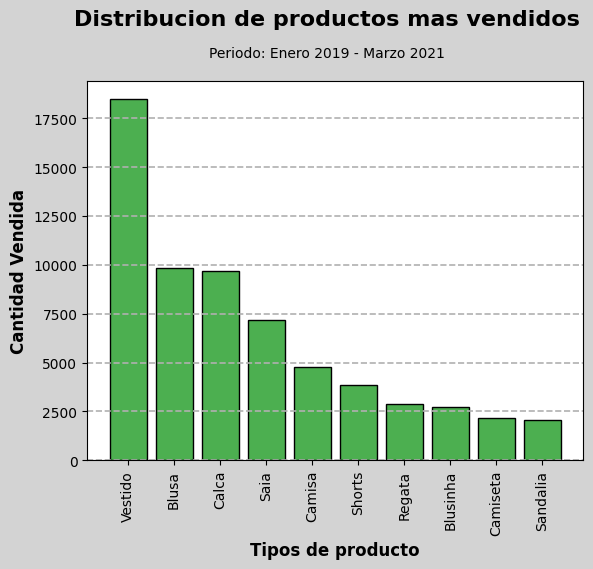

In [90]:
grafico_barras(df_vendidos['tipo_producto'], df_vendidos['cantidad'], 'Distribucion de productos mas vendidos', 'Periodo: Enero 2019 - Marzo 2021', 'Tipos de producto', 'Cantidad Vendida' )

Distribución de ciudades con mas productos vendidos

In [91]:
df_ciudades = df_final.groupby('ciudad')['valor_total'].sum().sort_values(ascending=False).reset_index()
df_ciudades.head()

,ciudad,valor_total
0,Alagoas,1902520
1,Pernambuco,1886497
2,Santa Catarina,1846203
3,Amapá,1844672
4,Ceará,1835101


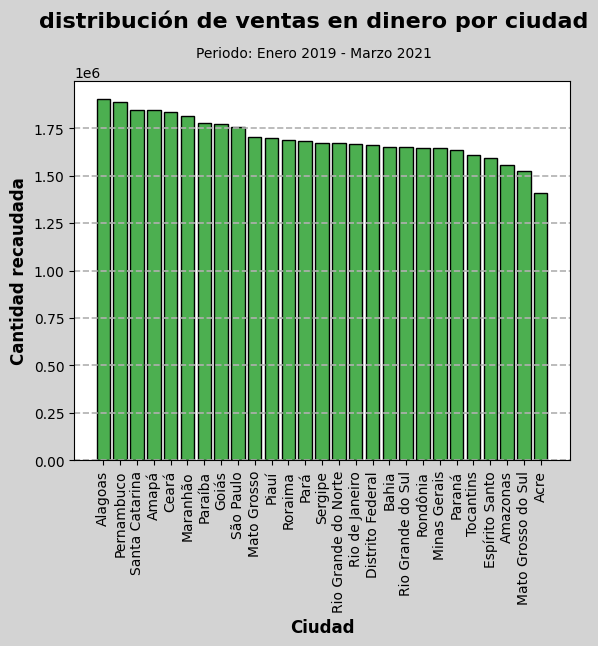

In [92]:
grafico_barras(df_ciudades['ciudad'], df_ciudades['valor_total'], 'distribución de ventas en dinero por ciudad', 'Periodo: Enero 2019 - Marzo 2021' , 'Ciudad', 'Cantidad recaudada')

Condición de los articulos que se venden

In [93]:
condicion = df_final['condicion'].value_counts().reset_index()
condicion

,condicion,count
0,Usado,21050
1,Nuevo con etiqueta,2606
2,Nuevo sin etiqueta,871


Grafico de pie

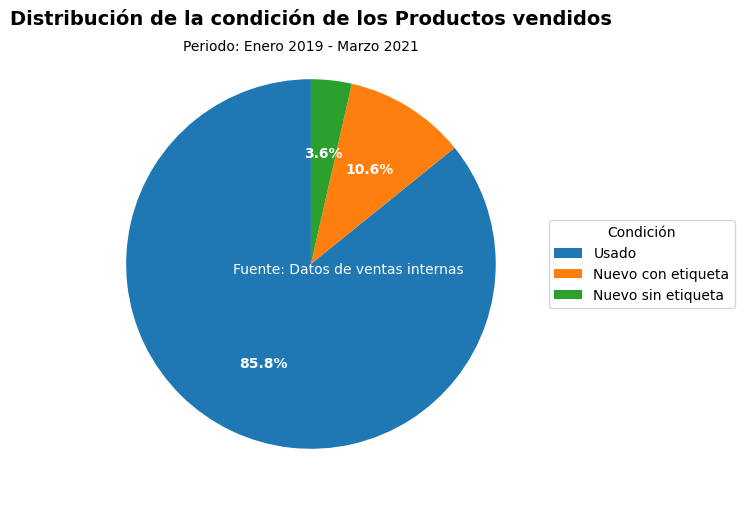

In [94]:
# Datos (asumiendo que tienes un DataFrame llamado df)
etiquetas = condicion['condicion']
valores = condicion['count']

# Colores personalizados
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Azul, naranja, verde

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))  # Ajustar el tamaño del gráfico

# Crear el gráfico de pie
wedges, texts, autotexts = ax.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores,
                                 wedgeprops=dict(width=1), textprops=dict(color="w"))

# Título y subtítulo
ax.set_title('Distribución de la condición de los Productos vendidos', fontsize=14, fontweight='bold')
fig.text(0.5, 0.85, 'Periodo: Enero 2019 - Marzo 2021', ha='center', fontsize=10)
ax.text(0.2, -0.05, 'Fuente: Datos de ventas internas', ha='center', fontsize=10, fontdict= dict(color="w"))

# Ajustar el tamaño del texto de los porcentajes
plt.setp(autotexts, size=10, weight="bold")

ax.legend(wedges, etiquetas, title="Condición", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mostrar el gráfico
plt.show()


### **Preguntas**






1. ¿Cual es el Top 5 productos más vendidos históricamente?

In [95]:

df_prod_mas_vendidos = df_final.groupby('producto')['cantidad'].sum().sort_values(ascending=False).reset_index().head(5)
df_prod_mas_vendidos

,producto,cantidad
0,Vestido Recortes Cores,795
1,Calca Jeans Costuras,755
2,Saia Pregas Preta,751
3,Calca Alfaiataria Preta,750
4,Saia Midi Cinto,549


grafica de dichos productos

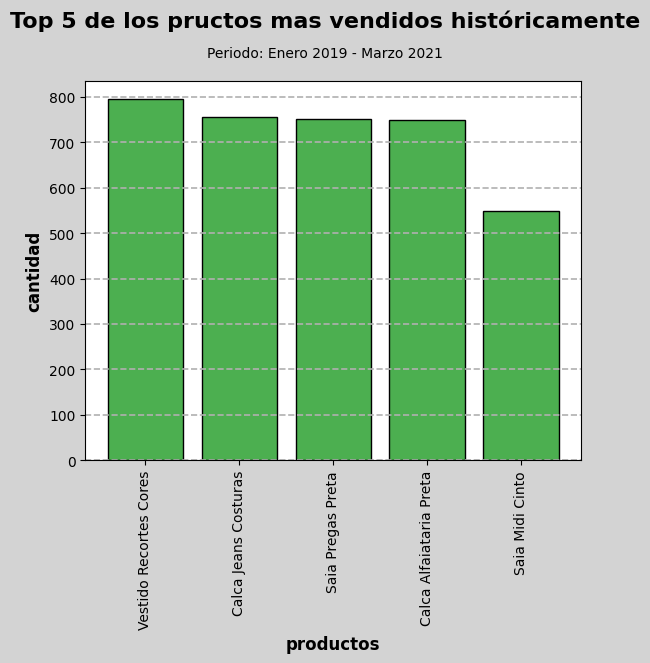

In [96]:
grafico_barras(df_prod_mas_vendidos['producto'], df_prod_mas_vendidos['cantidad'], 'Top 5 de los pructos mas vendidos históricamente', 'Periodo: Enero 2019 - Marzo 2021', 'productos', 'cantidad')

2. ¿Cual es la evolución histórica de las ingresos netos?

Se crea otra columna con los ingresos netos, la cual resulta de restar al valor total el costo de envio del producto

In [97]:
df_final['ingreso_neto'] = df_final['valor_total'] - df_final['costo_envio']

Creamos un DataFrame agrupando la suma de todas las ganancias netas por mes

In [98]:
df_ingreso_neto = df_final[['fecha_compra', 'ingreso_neto']].groupby(pd.Grouper(key= 'fecha_compra', freq='ME')).sum().reset_index()
df_ingreso_neto.tail(4)

,fecha_compra,ingreso_neto
23,2020-12-31,2763424.8
24,2021-01-31,1677687.2
25,2021-02-28,912583.2
26,2021-03-31,41220.0


Grafico de linea

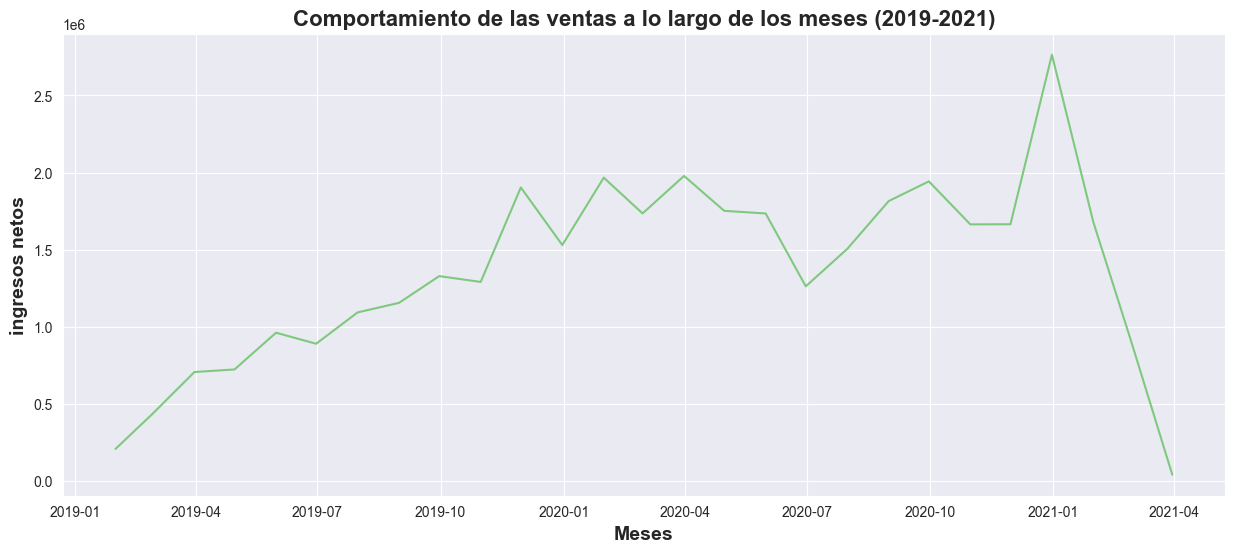

In [99]:
import seaborn as sns # type: ignore
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax =sns.lineplot(x = 'fecha_compra', y = 'ingreso_neto', data = df_ingreso_neto)
ax.figure.set_size_inches(15,6)
ax.set_title('Comportamiento de las ventas a lo largo de los meses (2019-2021)', loc='center', fontsize = 16,  fontweight='bold')
ax.set_xlabel('Meses', fontsize = 14, fontweight='bold')
ax.set_ylabel('ingresos netos', fontsize = 14, fontweight='bold')
ax = ax


3. ¿Cuáles son los ingresos netos por vendedor por año?



In [100]:
df_final.head(1)

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio,latitud,longitud,...,anio,mes,num_mes,producto,tipo_producto,marca,sku,condicion,nombre_vendedor,ingreso_neto
0,1,41518,341,3,260,780,Bahia,156.0,-12.9704,-38.5124,...,2019,January,1,Calca Jeans Basica,Calca,Banana Republic,255410.0,Nuevo con etiqueta,Unknown,624.0


In [101]:
df_ingresos_x_vendedor = df_final.groupby(['nombre_vendedor','anio'])['ingreso_neto'].sum().sort_values(ascending=False).reset_index()
df_ingresos_x_vendedor = df_ingresos_x_vendedor.sort_values(by=['anio', 'ingreso_neto'], ascending=False).reset_index(drop=True)
df_ingresos_x_vendedor

,nombre_vendedor,anio,ingreso_neto
0,Nadia Oliveira,2021,810020.0
1,Ana Duarte,2021,547470.4
2,Paulo Calanca,2021,455401.6
3,Daniel Siqueira,2021,419702.4
4,Millena Pereira,2021,398896.0
5,Daniel Siqueira,2020,5266932.8
6,Ana Duarte,2020,5054009.6
7,Nadia Oliveira,2020,4046902.4
8,Millena Pereira,2020,3804385.6
9,Paulo Calanca,2020,3609530.4


4. ¿Cuáles son las ciudades que proporcionan mayores ingresos netos?



In [102]:
df_final.head(3)

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio,latitud,longitud,...,anio,mes,num_mes,producto,tipo_producto,marca,sku,condicion,nombre_vendedor,ingreso_neto
0,1,41518,341,3,260,780,Bahia,156.0,-12.9704,-38.5124,...,2019,January,1,Calca Jeans Basica,Calca,Banana Republic,255410.0,Nuevo con etiqueta,Unknown,624.0
1,2,4307,1174,5,6175,30875,Rio de Janeiro,6175.0,-22.9068,-43.1729,...,2019,January,1,Bolsa Intrecciato Caramelo,Bolsa,Bottega Veneta,301305.0,Usado,Nadia Oliveira,24700.0
2,3,22407,1399,3,200,600,Paraíba,120.0,-7.2398,-36.7819,...,2019,January,1,Cropped Listras Florzinhas,Cropped,Topshop,327426.0,Usado,Ana Duarte,480.0


In [103]:
df_ciudades_ingresos_netos= df_final.groupby('ciudad')['ingreso_neto'].sum().sort_values(ascending=False).reset_index()
df_ciudades_ingresos_netos.head(5)

,ciudad,ingreso_neto
0,Alagoas,1522016.0
1,Pernambuco,1509197.6
2,Santa Catarina,1476962.4
3,Amapá,1475737.6
4,Ceará,1468080.8


5. ¿Existe otro insight que puedas proporcionar? marca de ropa con mas ingresos netos

In [104]:
df_marca_ropa_ingresos_netos = df_final.groupby('marca')['ingreso_neto'].sum().sort_values(ascending=False).reset_index()
df_marca_ropa_ingresos_netos.head(5)

,marca,ingreso_neto
0,Mixed,3671312.8
1,Christian Dior,2529200.0
2,Bottega Veneta,1773460.0
3,Christian Louboutin,1457040.0
4,Barbara Bela,1451520.0


6. Analisis del compórtamiento de ventas por temporada

In [105]:
# se crea una funcion para segmetantar las temporadas
def obtener_estacion(fecha):
    if (fecha >= pd.to_datetime(f'{fecha.year}-12-21')) or (fecha < pd.to_datetime(f'{fecha.year}-03-21')):
        return 'Verano'
    elif (fecha >= pd.to_datetime(f'{fecha.year}-03-21')) and (fecha < pd.to_datetime(f'{fecha.year}-06-21')):
        return 'Otoño'
    elif (fecha >= pd.to_datetime(f'{fecha.year}-06-21')) and (fecha < pd.to_datetime(f'{fecha.year}-09-23')):
        return 'Invierno'
    else:
        return 'Primavera'

# Crear la nueva columna de estaciones
df_final['estacion'] = df_final['fecha_compra'].apply(obtener_estacion)

In [106]:
pd.set_option('display.max_columns', None)
df_final.head(1)


,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio,latitud,longitud,vendedor_id,fecha_compra,anio,mes,num_mes,producto,tipo_producto,marca,sku,condicion,nombre_vendedor,ingreso_neto,estacion
0,1,41518,341,3,260,780,Bahia,156.0,-12.9704,-38.5124,6,2019-01-05,2019,January,1,Calca Jeans Basica,Calca,Banana Republic,255410.0,Nuevo con etiqueta,Unknown,624.0,Verano


temporada del año con mas ingresos netos por año

In [107]:
df_temporada= df_final[df_final['fecha_compra'].dt.year != 2021]
df_temporada = df_temporada.groupby(['estacion', 'anio'])[ 'ingreso_neto'].sum().reset_index()
df_temporada.sort_values(by= 'anio', ascending=False, inplace=True)
df_temporada

,estacion,anio,ingreso_neto
1,Invierno,2020,5299584.0
3,Otoño,2020,5056022.4
5,Primavera,2020,5618332.8
7,Verano,2020,5807821.6
0,Invierno,2019,3451633.6
2,Otoño,2019,2600541.6
4,Primavera,2019,4651532.8
6,Verano,2019,1526184.8


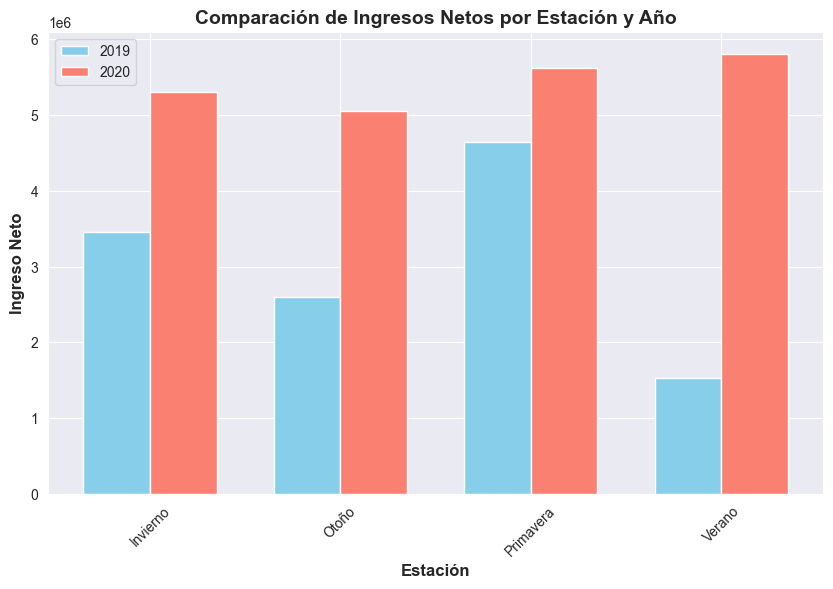

In [108]:
# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Ancho de las barras y posiciones
bar_width = 0.35
r1 = range(len(df_temporada['estacion'].unique()))
r2 = [x + bar_width for x in r1]

# Barras para cada año
plt.bar(r1, df_temporada[df_temporada['anio'] == 2019]['ingreso_neto'], color='skyblue', width=bar_width, edgecolor='white', label='2019')
plt.bar(r2, df_temporada[df_temporada['anio'] == 2020]['ingreso_neto'], color='salmon', width=bar_width, edgecolor='white', label='2020')

# Personalizar el gráfico
plt.xlabel('Estación', fontsize=12, fontweight='bold')
plt.ylabel('Ingreso Neto', fontsize=12, fontweight='bold')
plt.title('Comparación de Ingresos Netos por Estación y Año', fontsize=14, fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(df_temporada['estacion'].unique()))], df_temporada['estacion'].unique(), rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.99)

7. Productos mas vendidos por estacion del año

In [109]:
df_temp_producto = df_final[df_final['fecha_compra'].dt.year != 2021]
df_temp_producto = df_temp_producto.groupby(['tipo_producto', 'estacion'])['cantidad'].sum().reset_index()
df_temp_producto.sort_values(by='cantidad', ascending=False, inplace = True)
df_temp_producto.head(4)

,tipo_producto,estacion,cantidad
154,Vestido,Primavera,5383
152,Vestido,Invierno,4220
153,Vestido,Otoño,3764
155,Vestido,Verano,3726


In [110]:
df_final.head(1)

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio,latitud,longitud,vendedor_id,fecha_compra,anio,mes,num_mes,producto,tipo_producto,marca,sku,condicion,nombre_vendedor,ingreso_neto,estacion
0,1,41518,341,3,260,780,Bahia,156.0,-12.9704,-38.5124,6,2019-01-05,2019,January,1,Calca Jeans Basica,Calca,Banana Republic,255410.0,Nuevo con etiqueta,Unknown,624.0,Verano


In [111]:
df_final.to_csv("D:/bootcamp_experience/visualizacion/df_final.csv", index=False)